## CPSC 340 Lecture 7: Ensemble Methods

This notebook is for the in-class activities. It assumes you have already watched the [associated video](https://www.youtube.com/watch?v=3SD6fgNGZSo&list=PLWmXHcz_53Q02ZLeAxigki1JZFfCO6M-b&index=6).

<font color='red'>**REMINDER TO START RECORDING**</font>

Also, reminder to enable screen sharing for Participants.

## Today's pre-class songs

1. Heybb! by binki
2. Heaven by The Walkmen

## Admin

- a2 posted
- a1 solution updated to include code
- Survey results: https://edstem.org/us/courses/3226/discussion/218421
  - You seem to be OK with breakout rooms ✔️
  - You seem to be OK with recording the chat ✔️
  - Your preference for how we spend class time seems to be:
  1. Old exam questions
  2. Video summary
  3. True/False polls
  4. Answering student questions
- Countdown to reading week: 9 more classes

## Video chapters

- decision theory
- classification metrics (bonus)
- prominent hyperparameters
- naive Bayes recap
- ensembles - intro
- averaging models
- random forests
  - average of a bunch of decision trees, but...
  - each tree looks at a slightly different version of the dataset (bootstrap)
  - each split (stump) only gets to choose from a random subset of the features
- part 1 recap

## Old exam questions

#### From 2017W2 midterm

Consider the classification boundary below, with the training data shown.

![](img/L7/rf.png)

Do you think this boundary was produced by a decision tree or a random forest? Briefly explain your reasoning.

**Mike's answer**: random forest. Some of the splits shown here wouldn't make sense for a decision tree. Random forests are harder to understand/interpret so it's harder to say yes/no to random forest given the picture, but we can say "no" to decision tree. 

_see code at the end of this notebook_

#### From 2017S1 midterm

Why do we create random forests out of random trees (trees where each stump only looks at a subset of the features, and the dataset is a bootstrap sample) rather than creating them out of regular decision trees?

**Mike's answer:** If we used regular decision trees, we'd get the same tree each time, and averaging would not accomplish anything.

## True/False questions

The following hyperparameter changes would result in **lower training error**:

1. Increasing the number of features considered for each split in a random forest will tend to decrease training error.
2. Increasing the number of trees in a random forest will tend to decrease training error.
3. Let classifiers A, B, and C have training errors of 10%, 30%, and 30%, respectively. Then, the best possible training error from averaging A, B and C is 10%.
4. Let classifiers A, B, and C all have 30% error. Then, the worst possible training error from averaging A, B and C is 30%.


**Mike's answers**:

1. True. Giving the trees more options means they should be able to better fit the training data.
2. True. This is again making the model more complex which pushes the fundamental tradeoff towards lower training error.
3. False. Surprisingly, adding in worse classifiers to a 10%-error-classifier can actually improve it! The power of averaging. 
4. False. 

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# code adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plotClassifier(model, X, y, transformation=None, filename=None):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max,200)
    x2_line =  np.linspace(x2_min, x2_max,200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)

    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    
    if transformation is not None:
        mesh_data = transformation(mesh_data)
    y_pred = model.predict(mesh_data)
    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred, cmap=plt.cm.RdBu, alpha=0.6)

    plt.scatter(x1[y<0], x2[y<0], color="b", marker="x", label="class $-1$")
    plt.scatter(x1[y>0], x2[y>0], color="r", marker="o", label="class $+1$")
    plt.legend(loc="best")
    plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') # remove ticks
    if filename is not None:
        plt.savefig(filename)

In [36]:
# make up some fake data
np.random.seed(8)
N = 20
X = np.random.randn(N,2)
y = np.random.choice((-1,+1),size=N)
X[y>0,0] += 1
X[y>0,1] += 1

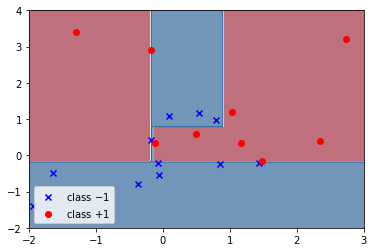

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X,y)
plotClassifier(dt, X, y)

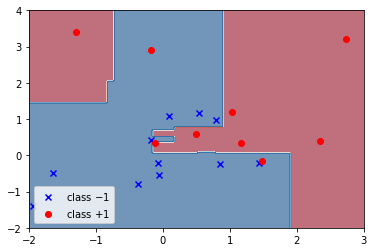

In [38]:
rf = RandomForestClassifier(n_estimators=6)
rf.fit(X,y)
plotClassifier(rf, X, y)

We can split up the random forest into its constituent trees and plot the decision boundary for each of these trees!

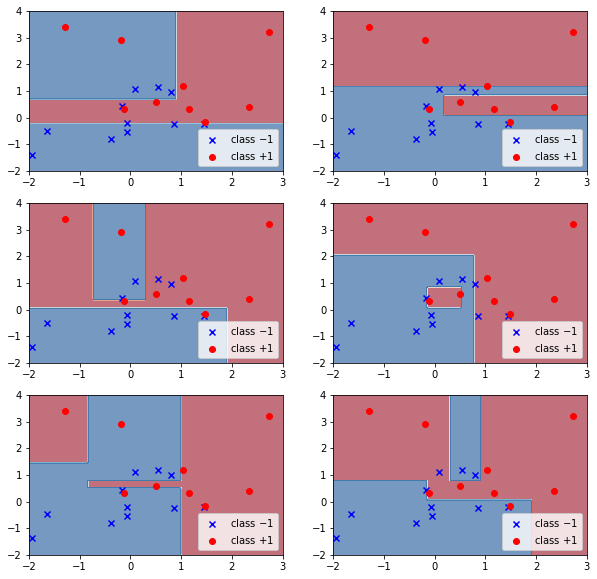

In [41]:
plt.figure(figsize=(10,10))
for i, tree in enumerate(rf.estimators_):
    plt.subplot(3,2,i+1);
    plotClassifier(tree, X, y);